In [6]:
import pandas as pd
import numpy as np # математика
#import random #генеерация случайных чисел

import plotly.express as px # Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
import datetime # преобразования с датами

import warnings
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import MinMaxScaler #нормализация данных

#from prophet import Prophet
#from statsmodels.tsa.stattools import adfuller # функция, проверяющая ряд на стационарность
#from sklearn.metrics import mean_squared_error,r2_score # расчет ошибок - насколько хорошо построился прогноз, насколько модель подходит под задачу

#from sklearn.linear_model import LogisticRegression #импорт регрессии
#from sklearn.model_selection import train_test_split#импорт готового сплита
#from sklearn.metrics import accuracy_score#оценка качества работы

<h2> 1. Cрез. Последние 5 сезонов: общие результаты матчей команд + атрибуты команд</h2>


In [7]:
df_team_att = pd.read_excel('ADD_5 seasons_team_att_all results_Tableаu.xlsm')
df_team_att.head(3)

,team_api_id,team_long_name,team_short_name,Страна,country_id,Рейтинг УЕФА,season_all victories,% season_all victories,season_all draws,% season_all draws,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930.0,FC Aarau,AAR,NaN,24558.0,NaN,18.0,0.250000,18.0,0.250000,...,64.0,Normal,Organised,47.0,Medium,44.0,Press,54.0,Normal,Cover
1,8485.0,Aberdeen,ABE,NaN,19694.0,NaN,85.0,0.447368,48.0,0.252632,...,63.0,Normal,Free Form,49.0,Medium,45.0,Press,63.0,Normal,Cover
2,8576.0,AC Ajaccio,AJA,NaN,4769.0,NaN,22.0,0.192982,40.0,0.350877,...,52.0,Normal,Organised,38.0,Medium,47.0,Press,53.0,Normal,Cover


In [8]:
df_team_att['awg_goals'] = df_team_att['season_all goals'] / df_team_att['season_all matces']
# добавляем показатель, среднее количество голов на матч для каждой команды

In [9]:
df_team_att[['% season_all victories','% season_all losses','% season_all draws','season_all matces','season_all goals','awg_goals']].describe().round(2)

,% season_all victories,% season_all losses,% season_all draws,season_all matces,season_all goals,awg_goals
count,228.00,228.00,228.00,228.00,228.00,228.00
mean,0.35,0.39,0.26,132.06,182.86,1.31
std,0.14,0.12,0.05,52.49,104.55,0.38
min,0.08,0.08,0.11,34.00,22.00,0.58
25%,0.26,0.33,0.23,90.00,101.00,1.07
50%,0.32,0.41,0.26,150.00,180.50,1.21
75%,0.41,0.47,0.29,178.00,248.25,1.45
max,0.79,0.74,0.39,190.00,556.00,2.93


<h4> Вывод: неравномерное распределение почти в каждом столбце, если использовать шкалу - не брать среднее</h4>


In [10]:
# перевод категорий в числовые признаки
buildUpPlaySpeedClass_to_replace={'Slow':-1,'Balanced':0,'Fast':1} 
buildUpPlayDribblingClass_to_replace={'Lots':1,'Normal':0,'Little':-1} 
buildUpPlayPassingClass_to_replace={'Short':-1,'Mixed':0,'Long':1} 
buildUpPlayPositioningClass_to_replace={'Free Form':0,'Organised':1} 
chanceCreationPassingClass_to_replace={'Risky':-1,'Normal':0,'Safe':1} 
chanceCreationCrossingClass_to_replace={'Lots':1,'Normal':0,'Little':-1}    
chanceCreationShootingClass_to_replace={'Lots':1,'Normal':0,'Little':-1} 
chanceCreationPositioningClass_to_replace={'Free Form':0,'Organised':1} 
defencePressureClass_to_replace={'Deep':-1,'Medium':0,'High':1} 
defenceAggressionClass_to_replace={'Contain':-1,'Press':0,'Double':1} 
defenceTeamWidthClass_to_replace={'Narrow':-1,'Normal':0,'Wide':1} 
defenceDefenderLineClass_to_replace={'Cover':0,'Ofside trap':1} 

df_team_att['buildUpPlaySpeedClass']=df_team_att['buildUpPlaySpeedClass'].replace(buildUpPlaySpeedClass_to_replace)
df_team_att['buildUpPlayDribblingClass']=df_team_att['buildUpPlayDribblingClass'].replace(buildUpPlayDribblingClass_to_replace)
df_team_att['buildUpPlayPassingClass']=df_team_att['buildUpPlayPassingClass'].replace(buildUpPlayPassingClass_to_replace)
df_team_att['buildUpPlayPositioningClass']=df_team_att['buildUpPlayPositioningClass'].replace(buildUpPlayPositioningClass_to_replace)
df_team_att['chanceCreationPassingClass']=df_team_att['chanceCreationPassingClass'].replace(chanceCreationPassingClass_to_replace)
df_team_att['chanceCreationCrossingClass']=df_team_att['chanceCreationCrossingClass'].replace(chanceCreationCrossingClass_to_replace)
df_team_att['chanceCreationShootingClass']=df_team_att['chanceCreationShootingClass'].replace(chanceCreationShootingClass_to_replace)
df_team_att['chanceCreationPositioningClass']=df_team_att['chanceCreationPositioningClass'].replace(chanceCreationPositioningClass_to_replace)
df_team_att['defencePressureClass']=df_team_att['defencePressureClass'].replace(defencePressureClass_to_replace)
df_team_att['defenceAggressionClass']=df_team_att['defenceAggressionClass'].replace(defenceAggressionClass_to_replace)
df_team_att['defenceTeamWidthClass']=df_team_att['defenceTeamWidthClass'].replace(defenceTeamWidthClass_to_replace)
df_team_att['defenceDefenderLineClass']=df_team_att['defenceDefenderLineClass'].replace(defenceDefenderLineClass_to_replace)

In [11]:
#корреляционный анализ
corr_matrix_team_att=df_team_att.select_dtypes(include=['float','int','bool']).corr()

<Axes: >

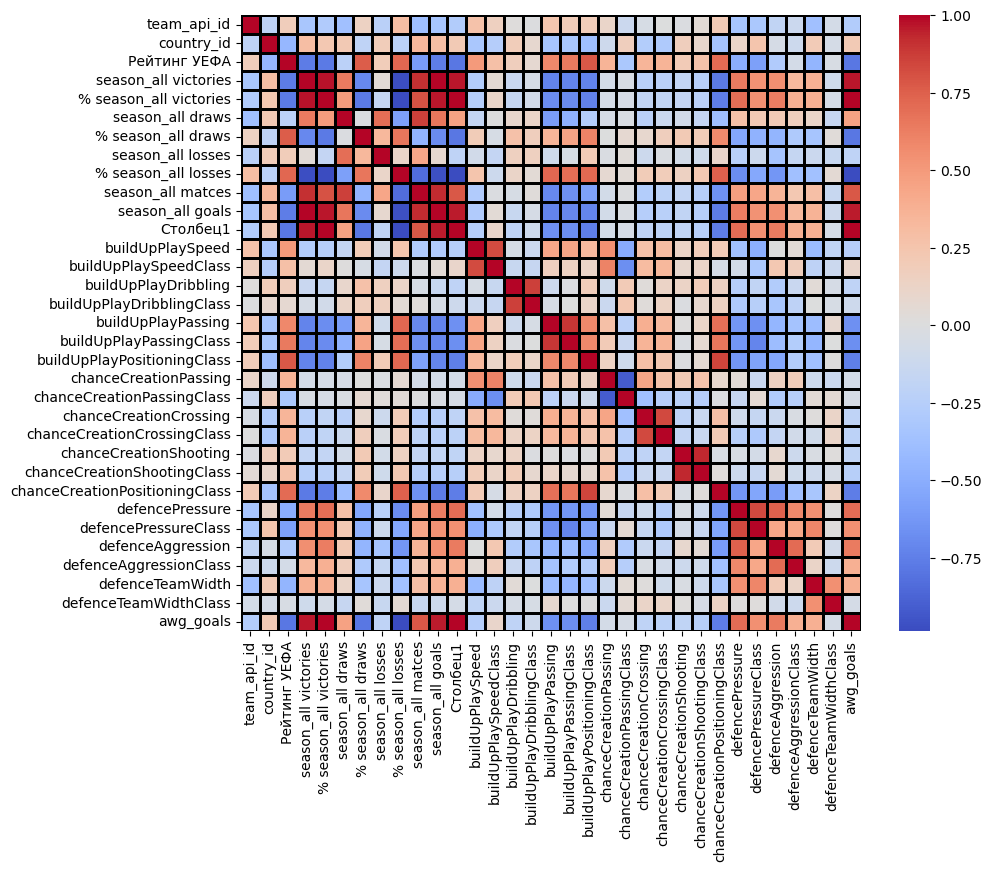

In [12]:
# строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_team_att.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

In [13]:
#print(df_team_att.columns)

In [14]:
#убираем аналогичные или неинтересные параметры
df_team_att_cut=df_team_att.drop(['team_api_id','team_long_name','team_short_name','country_id','season_all victories','date_stat','buildUpPlaySpeed',
                                  'buildUpPlayDribbling','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationCrossing',
                                  'chanceCreationCrossingClass','chanceCreationShooting','chanceCreationShootingClass','season_all goals','defencePressureClass',
                                  'defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass',], inplace=False,axis=1)

In [15]:
#корреляционный анализ
corr_matrix_team_att_cut=df_team_att_cut.select_dtypes(include=['float','int','bool']).corr()
#corr_matrix_team_att_cut.round(2)

<Axes: >

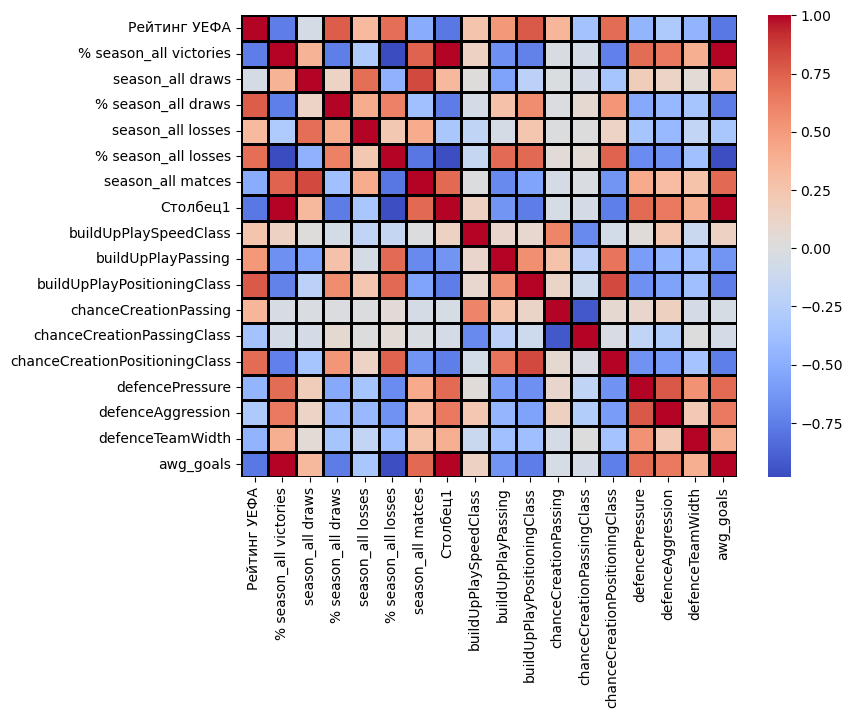

In [16]:
# строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_team_att_cut.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

<h4> Вывод: %побед - среднее количество голов. Чем больше матчей, тем больше % ничьих. Бальные значения чуть интереснее, чем классы в позициях про пассинг и защиту - возможно надо больше классов </h4>


<h2> 2. Cрез. Последние 2 сезона: общие результаты матчей команд + атрибуты среднего игрока</h2>


In [17]:
df_awgplayer_att = pd.read_excel('ADD_2seasons_team_avg player att_all resalts.xlsm')
df_awgplayer_att.head(3)

,player_name,last team_short name,last team_long_name,last team_api_id,country_id,Рейтинг УЕФА,season_all victories,% season_all victories,season_all draws,% season_all draws,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,AVG player,BEN,SL Benfica,9772,17642,NaN,56,0.823529,5,0.073529,...,66.796209,63.109005,43.545024,50.492891,46.118483,14.729858,15.341232,13.388626,13.824645,15.374408
1,AVG player,BMU,FC Bayern Munich,9823,7809,NaN,53,0.779412,8,0.117647,...,75.375000,65.531250,53.447917,60.250000,57.666667,13.114583,13.364583,13.697917,14.041667,13.322917
2,AVG player,BAR,FC Barcelona,8634,21518,NaN,59,0.776316,8,0.105263,...,70.620690,63.252874,54.137931,60.781609,59.057471,15.114943,16.011494,16.701149,16.080460,15.896552


In [18]:
df_awgplayer_att['awg_goals'] = df_awgplayer_att['season_all goals'] / df_awgplayer_att['season_all matces']
# добавляем показатель, среднее количество голов на матч для каждой команды

In [19]:
#print(df_awgplayer_att.columns)

In [20]:
#убираем аналогичные или неинтересные параметры
df_awgplayer_att_cut=df_awgplayer_att.drop(['last team_api_id', 'country_id','player_name','last team_short name','last team_long_name','season_all victories','season_all draws', 
                                            '% season_all draws','season_all losses','season_all goals','date_stat'], inplace=False,axis=1)

In [21]:
#корреляционный анализ
corr_awgplayer_att_cut=df_awgplayer_att_cut.select_dtypes(include=['float','int','bool']).corr()

<Axes: >

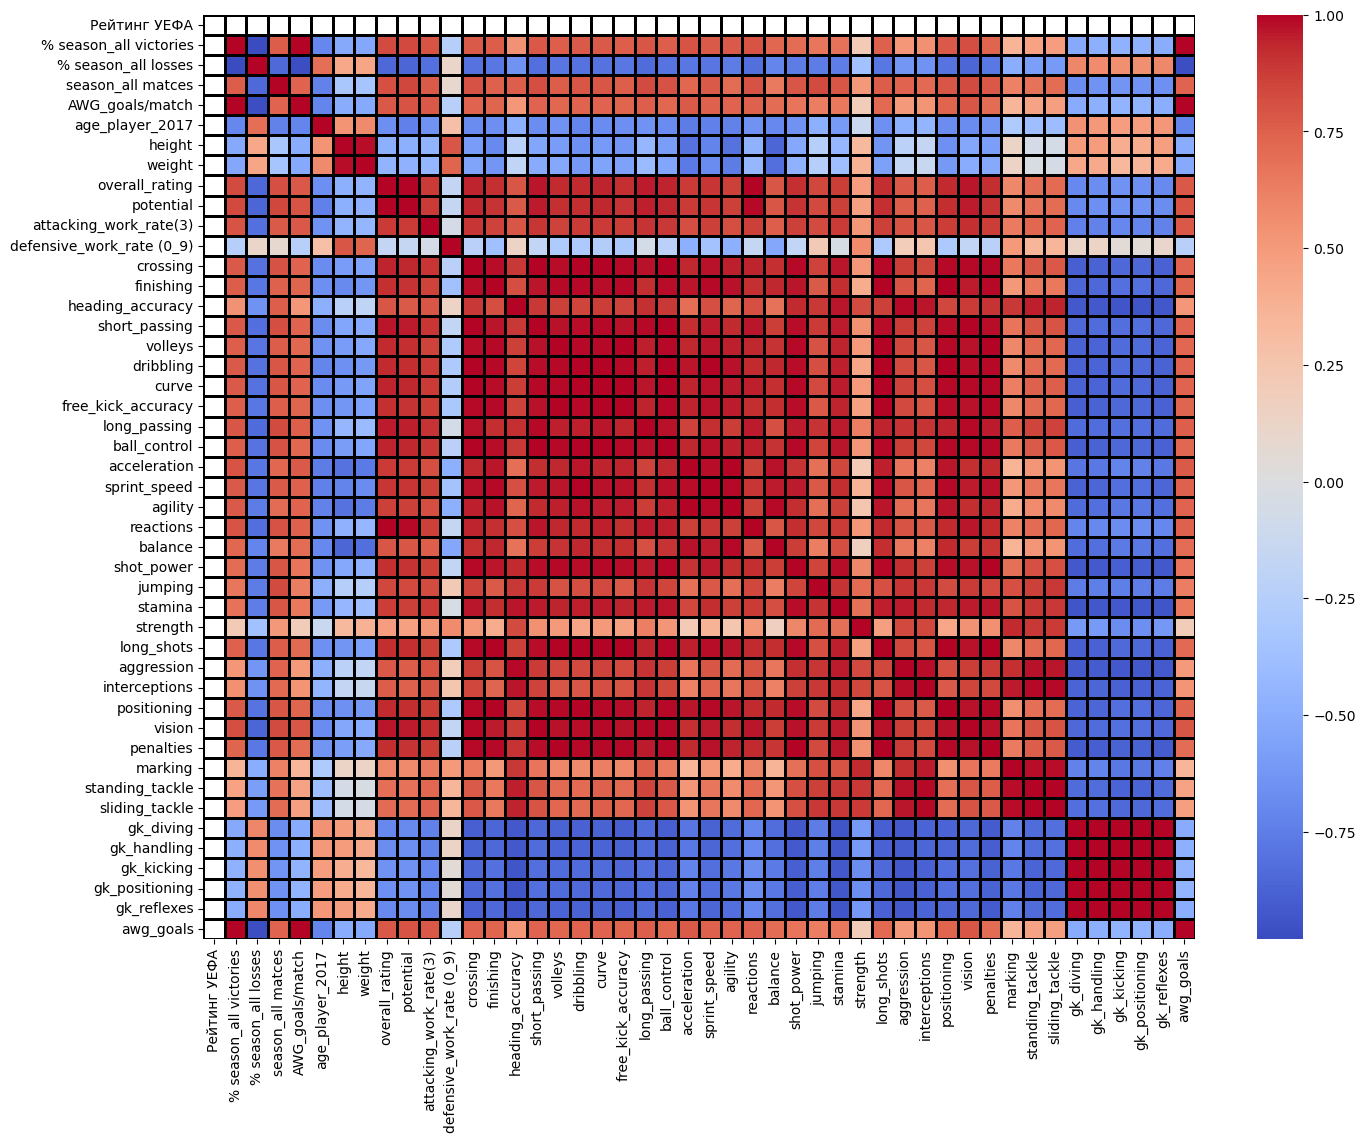

In [22]:
# строим тепловую карту
plt.figure(figsize=(16, 12))
sns.heatmap(corr_awgplayer_att_cut.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

<h4> Вывод: надо разбирать аттрибуты на 3 класса: атака - защита - общие, и смотреть по отдельности </h4>

<h2> 3. Собираем комплекты атрибутов команды и игроков в три группы - Атака, Защита и Общие</h2>


In [23]:
# Делаем 3 новых датасета по 3-м нужным характеристикам
#Набор атрибутов игроков для параметра АТАКА
df_attack_att_awgplayer=df_awgplayer_att[['age_player_2017','attacking_work_rate(3)','crossing','finishing','short_passing','volleys','dribbling','curve','free_kick_accuracy',
                                          'ball_control','sprint_speed','reactions','shot_power','long_shots','positioning','vision','penalties']]


In [24]:
#корреляционный анализ
corr_attack_att_awgplayer=df_attack_att_awgplayer.select_dtypes(include=['float','int','bool']).corr()

<Axes: >

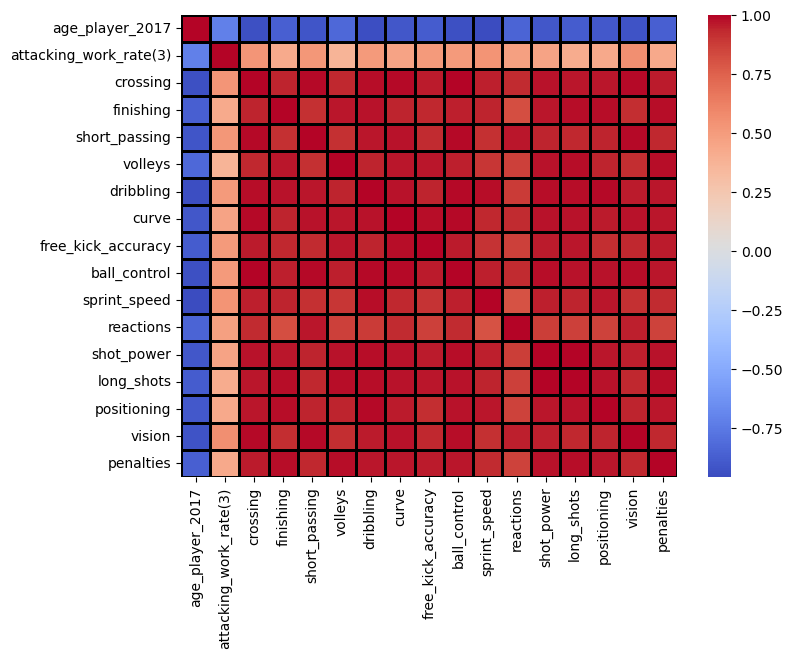

In [25]:
# строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(corr_attack_att_awgplayer.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

In [26]:
#corr_attack_att_awgplayer.round(1)

In [27]:
# Делаем 3 новых датасета по 3-м нужным характеристикам
#Набор атрибутов игроков для параметра ЗАЩИТА
df_defence_att_awgplayer=df_awgplayer_att[['height','weight','defensive_work_rate (0_9)','marking','gk_diving','gk_handling','gk_kicking', 'gk_positioning', 'gk_reflexes']]

In [28]:
#корреляционный анализ
corr_defence_att_awgplayer=df_defence_att_awgplayer.select_dtypes(include=['float','int','bool']).corr()

<Axes: >

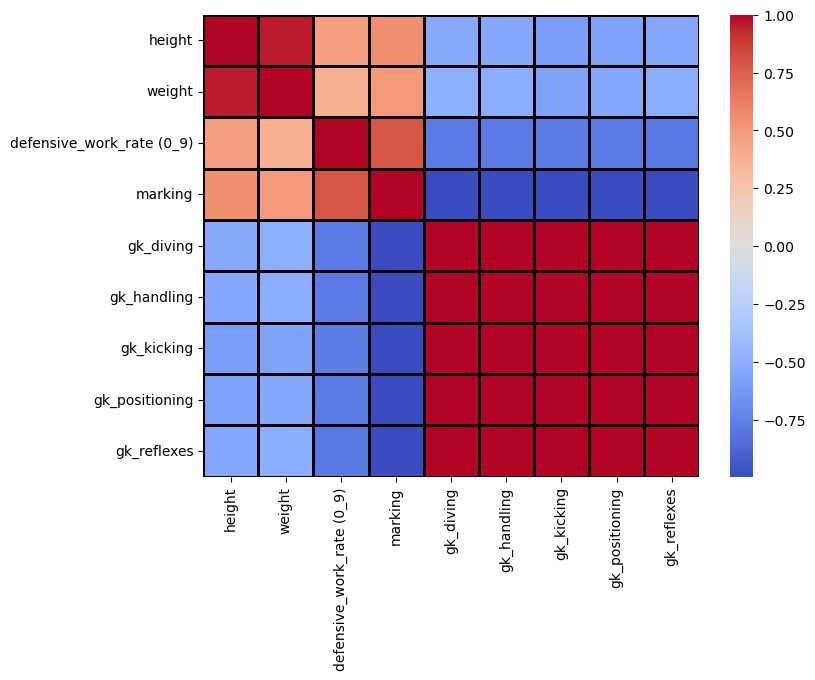

In [29]:
# строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(corr_defence_att_awgplayer.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

In [30]:
#corr_defence_att_awgplayer.round(1)

In [31]:
# Делаем 3 новых датасета по 3-м нужным характеристикам
#Набор атрибутов игроков для параметра ОБЩИЕ
df_general_att_awgplayer=df_awgplayer_att[['overall_rating','% season_all victories','% season_all losses','season_all matces','awg_goals',
                                           'heading_accuracy','long_passing','acceleration',
                                           'agility','reactions','balance','jumping','stamina','aggression','interceptions',
                                           'standing_tackle','sliding_tackle','strength']]

In [32]:
#корреляционный анализ
corr_general_att_awgplayer=df_general_att_awgplayer.select_dtypes(include=['float','int','bool']).corr()

<Axes: >

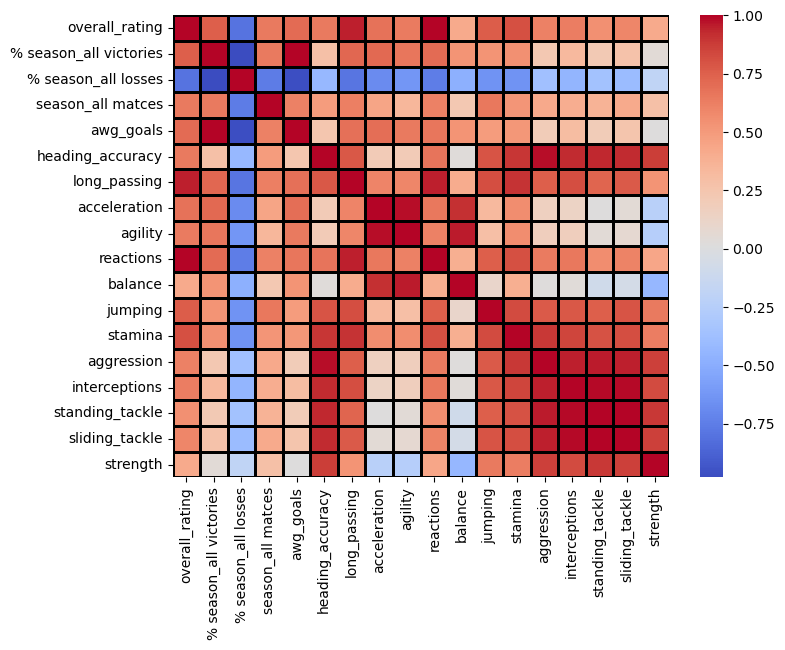

In [33]:
# строим тепловую карту
plt.figure(figsize=(8, 6))
sns.heatmap(corr_general_att_awgplayer.corr(), cmap= 'coolwarm', linecolor = 'black', linewidths=1)

<h2> 4. Анализ коэффициентов букмекеров для прогноза побед и поражений команд <h2> 

In [ ]:
<h2> 1. Cрез. Последние 5 сезонов: общие результаты матчей команд + атрибуты команд</h2>

In [48]:
# Создаем датафрейм из исходного файла базы данных Match
match = pd.read_csv('Match.csv')
#Заменяем пропуски бкумекерских контор на медианные значения
df['B365H'].fillna(df['B365H'].median(), inplace=True) 
df['B365D'].fillna(df['B365D'].median(), inplace=True) 
df['B365A'].fillna(df['B365A'].median(), inplace=True) 
df['BWH'].fillna(df['BWH'].median(), inplace=True) 
df['BWD'].fillna(df['BWD'].median(), inplace=True) 
df['BWA'].fillna(df['BWA'].median(), inplace=True) 
df['IWH'].fillna(df['IWH'].median(), inplace=True) 
df['IWD'].fillna(df['IWD'].median(), inplace=True) 
df['IWA'].fillna(df['IWA'].median(), inplace=True) 
df['LBH'].fillna(df['LBH'].median(), inplace=True) 
df['LBD'].fillna(df['LBD'].median(), inplace=True) 
df['LBA'].fillna(df['LBA'].median(), inplace=True) 
df['PSH'].fillna(df['PSH'].median(), inplace=True) 
df['PSD'].fillna(df['PSD'].median(), inplace=True) 
df['PSA'].fillna(df['PSA'].median(), inplace=True) 
df['WHH'].fillna(df['WHH'].median(), inplace=True) 
df['WHD'].fillna(df['WHD'].median(), inplace=True) 
df['WHA'].fillna(df['WHA'].median(), inplace=True) 
df['SJH'].fillna(df['SJH'].median(), inplace=True) 
df['SJD'].fillna(df['SJD'].median(), inplace=True) 
df['SJA'].fillna(df['SJA'].median(), inplace=True) 
df['VCH'].fillna(df['VCH'].median(), inplace=True) 
df['VCD'].fillna(df['VCD'].median(), inplace=True) 
df['VCA'].fillna(df['VCA'].median(), inplace=True)
df['GBH'].fillna(df['GBH'].median(), inplace=True)
df['GBD'].fillna(df['GBD'].median(), inplace=True)
df['GBA'].fillna(df['GBA'].median(), inplace=True)
df['BSH'].fillna(df['BSH'].median(), inplace=True)
df['BSD'].fillna(df['BSD'].median(), inplace=True)
df['BSA'].fillna(df['BSA'].median(), inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Добавление целевой переменной
# Функция determine_outcome  принимает строку (ряд) данных и определяет исход матча.
# Если домашняя команда забила больше голов, возвращается 1.
# Если гостевая команда забила больше голов, возвращается -1.
# Если голы равны, возвращается 0.
# Затем эта функция применяется к каждому ряду DataFrame, и новый столбец outcome (результат) добавляется к таблице.

def determine_outcome(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1  # Победа домашней команды
    elif row['home_team_goal'] < row['away_team_goal']:
        return -1  # Победа гостевой команды
    else:
        return 0  # Ничья

df['outcome'] = df.apply(determine_outcome, axis=1)

# Список признаков - коэффициенты букмекеров
features = [
    'B365H', 'B365D', 'B365A', 
    'BWH', 'BWD', 'BWA',
    'IWH', 'IWD', 'IWA',
    'LBH', 'LBD', 'LBA',
    'PSH', 'PSD', 'PSA',
    'WHH', 'WHD', 'WHA',
    'SJH', 'SJD', 'SJA',
    'VCH', 'VCD', 'VCA',
    'GBH', 'GBD', 'GBA',
]

X = df[features]
Y = df['outcome']
# Переменная features представляет список столбцов, которые служат признаками для модели. 
# В данном случае, это коэффициенты букмекерских контор для различных исходов (победа домашней команды, ничья и победа гостевой команды).
# X содержит значения признаков из df, а Y содержит целевую переменную — исход матча, которую мы определили ранее.
# Раздение данные на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
# test_size=0.3 указывает, что 30% данных будут отведены для тестирования, а 70% — для обучения.
# random_state=42 обеспечивает воспроизводимость результатов при разделении данных.
# stratify=Y гарантирует, что пропорции классов в исходных данных сохраняются в обеих выборках.

# Создание и обучение модели логистической регрессии
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)
# multi_class='multinomial' указывает на многоуровневую классификацию (когда есть более двух классов).
# solver='lbfgs' указывает на алгоритм оптимизации.
# max_iter=1000 устанавливает максимальное количество итераций для сходимости алгоритма.
# Прогнозирование
Y_predicted = model.predict(X_test)
# Здесь модель используется для предсказания результатов на тестовой выборке. Эти предсказанные значения сохраняются в переменной Y_predicted.
# Оценка модели


# accuracy_score(Y_test, Y_predicted) рассчитывает общую точность модели, то есть процент правильно предсказанных результатов.
# classification_report(Y_test, Y_predicted) предоставляет более подробную информацию о производительности модели, включая метрики,
# такие как точность (precision), полнота (recall) и F1-меру для каждого класса.
print('Accuracy:', accuracy_score(Y_test, Y_predicted))
print(classification_report(Y_test, Y_predicted))

Accuracy: 0.5259173723376956
              precision    recall  f1-score   support

          -1       0.52      0.40      0.45      2240
           0       0.40      0.00      0.00      1979
           1       0.53      0.89      0.66      3575

    accuracy                           0.53      7794
   macro avg       0.48      0.43      0.37      7794
weighted avg       0.49      0.53      0.44      7794



Точность 53 % выше,чем случайное угадывание, но это не очень хорошая цифра для прогнозирования. 
Необходимо проверить каждого букмекера на точность предсказаний и выбрать лучших

In [50]:
# Подсчет количества пропусков в столбцах с коэффициентами букмекеров
# Список столбцов для учета пропусков
columns_to_check = [
    'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 
    'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 
    'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 
    'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'
]

# Подсчёт количества пропусков в указанных столбцах
missing_counts = match[columns_to_check].isnull().sum()

# Вывод количества пропусков
print(missing_counts)
missing_counts_sum=match[columns_to_check].isnull().sum().sum()
print(missing_counts_sum)

B365H     3387
B365D     3387
B365A     3387
BWH       3404
BWD       3404
BWA       3404
IWH       3459
IWD       3459
IWA       3459
LBH       3423
LBD       3423
LBA       3423
PSH      14811
PSD      14811
PSA      14811
WHH       3408
WHD       3408
WHA       3408
SJH       8882
SJD       8882
SJA       8882
VCH       3411
VCD       3411
VCA       3411
GBH      11817
GBD      11817
GBA      11817
BSH      11818
BSD      11818
BSA      11818
dtype: int64
203460


Общее количество значений коэффициентов букмекеров равно количество столбцов умножить на количество строк 30х25979=779370. 
Количество пропусков составляет 203460/779370х100=26%. Это очень большое значение, которое нельзя игнорировать.

Расчет точности предсказаний каждого букмекера

In [51]:
# Создаем датафрейм из исходного файла базы данных Match
df = pd.read_csv('Match.csv')


# Определяем фактический результат матча
def get_actual_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 1  # Победа домашней команды
    elif row['home_team_goal'] < row['away_team_goal']:
        return -1  # Победа гостей
    else:
        return 0  # Ничья
# Функция get_actual_resul` принимает строку (один матч) и сравнивает количество голов домашней и гостевой команды.
# Если домашняя команда забила больше, возвращается 1 (победа домашней команды).
# Если гости забили больше, возвращается -1 (победа гостей).
# Если количество голов одинаково, возвращается 0 (ничья).
# Затем функция применяется ко всем строкам DataFrame с помощью `apply`, и фактические результаты сохраняются в новой колонке `actual_result`.
df['actual_result'] = df.apply(get_actual_result, axis=1)
display(df['actual_result'])


0        0
1        0
2       -1
3        1
4       -1
        ..
25974    1
25975   -1
25976    1
25977    0
25978    1
Name: actual_result, Length: 25979, dtype: int64

In [52]:
# Функция для предсказаний букмекеров
def bookmaker_prediction(row, b_h, b_d, b_a):
    if row[b_h] < row[b_d] and row[b_h] < row[b_a]:
        return 1  # Предположение о победе домашней команды
    elif row[b_d] < row[b_h] and row[b_d] < row[b_a]:
        return 0  # Предположение о ничьей
    else:
        return -1  # Предположение о победе гостей
# Функция bookmaker_prediction используется для предсказания исхода матча на основе коэффициентов букмекера. 
# Она принимает строку и три имени полей (коэффициенты на победу домашней команды, ничью и победу гостей).
# Если коэффициент на победу домашней команды меньше, чем на остальные исходы, возвращается 1.
# Если коэффициент на ничью меньше, возвращается 0.
# Если коэффициент на победу гостей меньше, возвращается -1.

# Список всех букмекеров
bookmakers = [
    'B365',
    'BW',
    'IW',
    'LB',
    'PS',
    'WH',
    'SJ',
    'VC',
    'GB',
    'BS'
]

# Проверяем наличие коэффициентов и создаем предсказания для каждого букмекера
for bookmaker in bookmakers:
    b_h = f'{bookmaker}H'
    b_d = f'{bookmaker}D'
    b_a = f'{bookmaker}A'

# Проверяем, существуют ли коэффициенты в DataFrame
    if all(col in df.columns for col in [b_h, b_d, b_a]):
        df[f'{bookmaker}_prediction'] = df.apply(lambda x: bookmaker_prediction(x, b_h, b_d, b_a), axis=1)
# В этом цикле для каждого букмекера:
# Формируются строки имен для коэффициентов (например, 'B365H', 'B365D', 'B365A').
# Проверяется, существуют ли все три коэффициента в DataFrame. Это важно, чтобы избежать ошибок, если не все коэффициенты доступны для данного букмекера.
# Если все коэффициенты присутствуют, создаются предсказания для данного букмекера, которые сохраняются в новой колонке (например, 'B365_prediction').


In [53]:
# Удаляем строки с пропусками в коэффициентах
df_cleaned = df.dropna(subset=[f'{bookmaker}H' for bookmaker in bookmakers if f'{bookmaker}H' in df.columns] +
                        [f'{bookmaker}D' for bookmaker in bookmakers if f'{bookmaker}D' in df.columns] +
                        [f'{bookmaker}A' for bookmaker in bookmakers if f'{bookmaker}A' in df.columns])
# Здесь мы очищаем DataFrame, удаляя строки, в которых есть пропуски для коэффициентов. 
# Мы составляем список колонок для каждого букмекера, проверяя, что они существуют в DataFrame перед использованием.

# Вычисляем точность предсказаний для каждого букмекера
def calculate_accuracy(df, prediction_column):
    total_matches = df.shape[0]
    correct_predictions = (df[prediction_column] == df['actual_result']).sum()
    return correct_predictions / total_matches if total_matches > 0 else 0
#Функция calculate_accuracy принимает DataFrame и имя колонки с предсказаниями. Она:
# Подсчитывает общее количество матчей, подсчитывает количество правильных предсказаний, 
# вычисляет и возвращает точность предсказаний (доля правильных предсказаний от общего количества)


# Вычисляем точность и выводим для каждого букмекера
accuracies = {}
for bookmaker in bookmakers:
    prediction_column = f'{bookmaker}_prediction'
    if prediction_column in df.columns:
        accuracy = calculate_accuracy(df_cleaned, prediction_column)
        accuracies[bookmaker] = accuracy
# Здесь мы создаем словарь accuracies, в который будем записывать точности для каждого букмекера.
# Для каждого букмекера проверяем, существует ли колонка предсказаний, и если да — вычисляем её точность, сохраняя результат в словаре.

# Выводим результаты
for bookmaker, accuracy in accuracies.items():
    print(f'Accuracy of {bookmaker}: {accuracy:.2%}')


Accuracy of B365: 51.31%
Accuracy of BW: 51.16%
Accuracy of IW: 51.12%
Accuracy of LB: 51.23%
Accuracy of PS: 51.38%
Accuracy of WH: 51.34%
Accuracy of SJ: 51.12%
Accuracy of VC: 51.38%
Accuracy of GB: 51.16%
Accuracy of BS: 51.12%


Точность 51 % выше,чем случайное угадывание, но это не очень хорошая цифра для прогнозирования. Для нашего дашборда она подходит плохо.

<h2> 5. Расчет вероятностей побед и поражений команд<h2> 

In [61]:
# Создаем датафрейм из исходного файла базы данных Match
match = pd.read_csv('Match.csv')

# Создаем две новые колонки home_win и away_win для результатов матчей cо значениями True и False
match['home_win'] = match['home_team_goal'] > match['away_team_goal']
match['away_win'] = match['away_team_goal'] > match['home_team_goal']
display(match.head())
display(match.shape)
# Создаем  словари для подсчета побед и поражений
wins = {}
losses = {}

# Обрабатываем результаты матчей
# Создаем переменные home_team_id и away_team_id, в которых будут перечисляться id команд
for index, row in match.iterrows():
    home_team_id = row['home_team_api_id']
    away_team_id = row['away_team_api_id']
    
# Подсчет побед
# Победа домашней команды:   
    if row['home_win']:
    
# Если home_win = True, значит выиграла домашняя команда, условие выполняется
        wins[home_team_id] = wins.get(home_team_id, 0) + 1
        losses[away_team_id] = losses.get(away_team_id, 0) + 1
    elif row['away_win']:
# Ключами в словаре wins являются идентификаторы команд (например, home_team_id), а значениями — количество побед соответствующих команд.
# home_team_id-это переменная, которая содержит идентификатор домашней команды, выигрывающей матч. Он используется в качестве ключа для доступа к значению в словаре wins.
# wins.get(home_team_id, 0): Это метод get словаря, который выдает значение, соответствующее ключу home_team_id из словаря wins. 
# Если такой ключ отсутствует, метод вернёт значение по умолчанию, которое в данном случае равно 0. 
# Если команда ещё не записывалась в словаре wins, то её стартовое количество побед должно быть нулевым.
# Так как команда выиграла, прибавляем +1, чтобы счетчик побед увеличивался.

# wins[home_team_id] =  Эта часть присваивает новое значение (текущее количество побед + 1) обратно в словарь  wins с ключом home_team_id.        
        
        
# Победа для гостевой команды
        wins[away_team_id] = wins.get(away_team_id, 0) + 1
        losses[home_team_id] = losses.get(home_team_id, 0) + 1

# Преобразуем в DataFrame 
results = pd.DataFrame({
    'team_api_id': list(set(wins.keys()).union(set(losses.keys()))),
# wins.keys(): Возвращает все ключи из словаря wins, которые представляют ID команд, выигравших матчи.
# losses.keys(): Возвращает все ключи из словаря losses, которые представляют ID команд, проигравших матчи.
# set(): Преобразует список ключей в множество, чтобы удалить дубликаты.
# union(): Объединяет два множества (выигрыши и проигрыши), чтобы получить все уникальные идентификаторы команд.
# Таким образом, результатом будет множество всех уникальных team_api_id, представляющих команды, которые либо выиграли, либо проиграли хотя бы один матч.
#list() Преобразует результат объединения множеств в список. Это позволяет использовать его для создания DataFrame.
   
    'wins': [wins.get(team_id, 0) for team_id in list(set(wins.keys()).union(set(losses.keys())))],
# Здесь создаётся новый список для столбца wins. Для каждого team_id в списке уникальных ID команд проверяется, есть ли этот ID в словаре wins.
# Если команда выигрывала, возвращает количество её побед, в противном случае возвращает 0. Таким образом, если команды нет в словаре wins, в этом поле будет указано 0.
    'losses': [losses.get(team_id, 0) for team_id in list(set(wins.keys()).union(set(losses.keys())))]
})
display(results) 

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_win,away_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,False,False
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,False,False
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,False,True
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,True,False
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,False,True


(25979, 117)

,team_api_id,wins,losses
0,10242,11,43
1,8194,7,18
2,10243,120,97
3,8197,34,22
4,10249,110,89
...,...,...,...
294,4087,45,71
295,10233,106,117
296,10235,139,70
297,10238,58,125


Создадим параметр team_rating, который равен разности между количеством побед и поражений каждой команды за все время. 
Он будет являться статистическим показателем успешности команды.

In [62]:
results['team_rating']=results['wins']-results['losses']
# Сортируем команды в порядке убывания рейтинга
results=results.sort_values(by=['team_rating'], ascending=False)
display(results)

,team_api_id,wins,losses,team_rating
119,8634,234,27,207
118,8633,228,40,188
222,9925,218,36,182
155,9773,183,23,160
154,9772,185,27,158
...,...,...,...,...
111,8597,86,142,-56
68,8472,78,134,-56
297,10238,58,125,-67
166,9800,61,131,-70


Расчет соотношения побед домашних и гостевых команд

In [63]:
# Воспользуемся датафреймом match
# Создание счётчиков побед
home_wins = 0
away_wins = 0
draws = 0

# Обрабатываем результаты матчей
for index, row in match.iterrows():
    if row['home_team_goal'] > row['away_team_goal']:
        home_wins += 1  # Победа домашней команды
    elif row['away_team_goal'] > row['home_team_goal']:
        away_wins += 1  # Победа гостевой команды
    else:
        draws += 1  # Ничья

# Выводим результаты
print(f"Количество побед домашних команд: {home_wins}")
print(f"Количество побед гостевых команд: {away_wins}")
print(f"Количество ничьих: {draws}")

# Рассчитываем соотношение
total_matches = home_wins + away_wins + draws

home_win_ratio = home_wins / total_matches * 100
away_win_ratio = away_wins / total_matches * 100
draw_ratio = draws / total_matches * 100

print(f"Соотношение побед домашних команд: {home_win_ratio:.2f}%")
print(f"Соотношение побед гостевых команд: {away_win_ratio:.2f}%")
print(f"Соотношение ничьих: {draw_ratio:.2f}%")


Количество побед домашних команд: 11917
Количество побед гостевых команд: 7466
Количество ничьих: 6596
Соотношение побед домашних команд: 45.87%
Соотношение побед гостевых команд: 28.74%
Соотношение ничьих: 25.39%


Этот коэффициент можно использовать в дашборде

Задача- рассчитать вероятность победы или поражения двух футбольных команд. 
Данные: 1) Рейтинг команд, рассчитанный по количеству побед и поражений в предыдущих играх, например, rating_1, rating_2 
2) Средний overall_rating игроков команд, например, overall_rating_1, overall_rating_2 
3) Известно статистическое соотношение побед: домашних команд: Ph=46%, гостевых команд: Pa=29%, ничьих: Pd= 25%.
Пользователь задает условие, какая команда играет в гостях. rating_1, overall_rating_1, overall_rating_2 содержатся в датафрейме, в нем же есть team_api_id соответствующих команд.
Пользователь вводит team_api_id двух команд и получает вероятность выигрыша, проигрыша и ничьи.

In [64]:
# Создаем датафрейм из исходного файла Common, в котором объединены все данные по матчам и командам
# Новый датафрейм будет содержать поля team_api_id, средний рейтинг average_overall_rating команд.

# Загрузка данных из файла Excel

df = pd.read_excel('Common.xlsx')

# Создание DataFrame для домашних команд с соответствующими рейтингами
home_teams = df[['home_team_api_id', 'h_overall_rating']].rename(columns={
    'home_team_api_id': 'team_api_id',
    'h_overall_rating': 'overall_rating'
})

# Создание DataFrame для гостевых команд с соответствующими рейтингами
away_teams = df[['away_team_api_id', 'a_overall_rating']].rename(columns={
    'away_team_api_id': 'team_api_id',
    'a_overall_rating': 'overall_rating'
})

# Объединение DataFrame для домашних и гостевых команд
combined_df = pd.concat([home_teams, away_teams], ignore_index=True)

## Подсчет среднего рейтинга для каждой команды и округление до одной десятичной цифры
average_ratings = combined_df.groupby('team_api_id', as_index=False)['overall_rating'].mean()
average_ratings['overall_rating'] = average_ratings['overall_rating'].round(1)

# Переименование столбца для ясности
average_ratings.rename(columns={'overall_rating': 'average_overall_rating'}, inplace=True)

# Вывод результата
print(average_ratings)

     team_api_id  average_overall_rating
0           1601                    64.1
1           1773                    65.6
2           1957                    65.9
3           2033                    68.4
4           2182                    68.0
..           ...                     ...
294       158085                    69.5
295       177361                    61.7
296       188163                    66.9
297       208931                    71.2
298       274581                    66.3

[299 rows x 2 columns]


In [66]:
# Добавляем в датафрейм поле team_rating по соответствующему team_api_id
combined_df=pd.merge(average_ratings, results, on='team_api_id', how='left')
combined_df.head(5)

,team_api_id,average_overall_rating,wins,losses,team_rating
0,1601,64.1,92,91,1
1,1773,65.6,22,40,-18
2,1957,65.9,87,89,-2
3,2033,68.4,32,63,-31
4,2182,68.0,124,56,68


In [68]:
# Рассчитываем вероятности
df = combined_df
def calculate_probabilities(team1_id, team2_id):
    # Получаем данные для заданных команд
    team1 = df[df['team_api_id'] == team1_id]
    team2 = df[df['team_api_id'] == team2_id]
    
    if team1.empty or team2.empty:
        return "Одна из команд не найдена в данных."
    
    # Извлечение информации
    team_rating_1 = team1['team_rating'].values[0]  
    average_overall_rating_1 = team1['average_overall_rating'].values[0]
    
    team_rating_2 = team2['team_rating'].values[0]  
    average_overall_rating_2 = team2['average_overall_rating'].values[0]
    
    # Обработка вероятностей до нормализации
    total_rating = (team_rating_1 + average_overall_rating_1) + (team_rating_2 + average_overall_rating_2)

    if total_rating == 0:  # Проверка на деление на ноль
        return {
            'home_win_probability': 0.0,
            'away_win_probability': 0.0,
            'draw_probability': 1.0,
        }

    # Модель для расчета вероятностей
    #Соотношение побед: домашних команд: Ph=46%, гостевых команд: Pa=29%, ничьих: Pd= 25%
    Ph=0.46
    Pa=0.29
    Pd= 0.25
    
    probability_home_win = (team_rating_1 + average_overall_rating_1) / total_rating * Ph
    probability_away_win = (team_rating_2 + average_overall_rating_2) / total_rating * Pa
    probability_draw = Pd
    
    # Корректировка итоговых вероятностей
    total = probability_home_win + probability_away_win + probability_draw
    
    if total == 0:  # Если сумма также равна нулю
        return {
            'home_win_probability': 0.0,
            'away_win_probability': 0.0,
            'draw_probability': 1.0,
        }
    
    # Обновление вероятностей
    probability_home_win /= total
    probability_away_win /= total
    probability_draw /= total

    # Округление результатов до двух знаков после запятой
    return {
        'home_win_probability': round(probability_home_win, 2),
        'away_win_probability': round(probability_away_win, 2),
        'draw_probability': round(probability_draw, 2),
    }

# Ввод данных пользователем
team1_id = int(input("Введите идентификатор домашней команды: "))  # Идентификатор домашней команды
team2_id = int(input("Введите идентификатор гостевой команды: "))   # Идентификатор гостевой команды

result = calculate_probabilities(team1_id, team2_id)
print(result)

Введите идентификатор домашней команды:  8597
Введите идентификатор гостевой команды:  8634


{'home_win_probability': 0.02, 'away_win_probability': 0.52, 'draw_probability': 0.46}


Пример: id лузера -  8597, id чемпиона - 8634